# Study of Wikipedia_English Network of Articles (6.5Gb):

In [1]:
# Libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random 
import itertools as it
#from tempfile import TemporaryFile

## (1) Control Raw DataFile

In [93]:
# Calculation of the number of lines in the Data File (out)
with open("Project_10_Wikipedia_EN/out",'r') as f:
        NBD = 0
        for line in f:
            NBD += 1
        print("---> Number of lines in this Data is:", NBD)

---> Number of lines in this Data is: 378142421


In [3]:
# Pickout three subgraphs with a max size of 100K
with open("Project_10_Wikipedia_EN/out",'r') as f:
    with open("f1out",'w') as f1, open("f2out",'w') as f2, open("f3out",'w') as f3:
        c = 0
        for line in f:
            c += 1
            if ((c > 1) & (c < 100002)) :
                f1.write(line)
            if ((c > 189071210) & (c < 189171212)):
                f2.write(line)
            if (c > 378042420):
                f3.write(line)

## (2) Build the Data for the networks

In [184]:
###################################################################################################################
with open("f1out",'r') as f1o:
    f1d1 = []
    f1d2 = []
    f1d3 = []
    f1d4 = []
###################################################################################################################
    f1d1f = [next(f1o) for x in range(10)]
    print(f1d1f)
    for line in f1d1f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f1d1.append([i,j])
###################################################################################################################
    f1d2f = [next(f1o) for x in range(100)]
    print(f1d2f)
    for line in f1d2f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f1d2.append([i,j])
###################################################################################################################
    f1d3f = [next(f1o) for x in range(1000)]
    print(f1d3f)
    for line in f1d3f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f1d3.append([i,j])
###################################################################################################################
    f1d4f = [next(f1o) for x in range(10000)]
    print(f1d4f)
    for line in f1d4f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f1d4.append([i,j])
###################################################################################################################

['1 2 \n', '3 2 \n', '4 2 \n', '5 2 \n', '6 2 \n', '7 2 \n', '8 2 \n', '9 2 \n', '10 2 \n', '11 2 \n']
['12 2 \n', '13 2 \n', '14 2 \n', '15 2 \n', '16 2 \n', '17 2 \n', '18 2 \n', '19 2 \n', '20 2 \n', '21 2 \n', '22 2 \n', '23 2 \n', '24 2 \n', '25 2 \n', '26 2 \n', '27 28 \n', '29 28 \n', '30 28 \n', '31 32 \n', '33 32 \n', '34 32 \n', '35 32 \n', '36 32 \n', '37 32 \n', '38 32 \n', '39 32 \n', '40 32 \n', '41 32 \n', '42 32 \n', '43 32 \n', '44 32 \n', '45 32 \n', '46 32 \n', '47 32 \n', '48 32 \n', '49 32 \n', '50 32 \n', '51 32 \n', '52 32 \n', '53 32 \n', '54 32 \n', '55 32 \n', '56 32 \n', '57 32 \n', '58 32 \n', '59 32 \n', '60 32 \n', '61 32 \n', '62 32 \n', '63 32 \n', '64 32 \n', '65 32 \n', '66 32 \n', '67 32 \n', '68 32 \n', '69 32 \n', '70 32 \n', '71 32 \n', '72 32 \n', '73 32 \n', '74 32 \n', '75 32 \n', '76 32 \n', '77 32 \n', '78 32 \n', '79 32 \n', '28 32 \n', '80 32 \n', '81 32 \n', '82 32 \n', '83 32 \n', '84 32 \n', '85 32 \n', '86 32 \n', '87 32 \n', '88 32 \n',

In [185]:
with open("f1out",'r') as f1o:
    f1d5 = []
    f1d5f = [next(f1o) for x in range(100000)]
    print(f1d5f)
    for line in f1d5f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f1d5.append([i,j])
###################################################################################################################

['1 2 \n', '3 2 \n', '4 2 \n', '5 2 \n', '6 2 \n', '7 2 \n', '8 2 \n', '9 2 \n', '10 2 \n', '11 2 \n', '12 2 \n', '13 2 \n', '14 2 \n', '15 2 \n', '16 2 \n', '17 2 \n', '18 2 \n', '19 2 \n', '20 2 \n', '21 2 \n', '22 2 \n', '23 2 \n', '24 2 \n', '25 2 \n', '26 2 \n', '27 28 \n', '29 28 \n', '30 28 \n', '31 32 \n', '33 32 \n', '34 32 \n', '35 32 \n', '36 32 \n', '37 32 \n', '38 32 \n', '39 32 \n', '40 32 \n', '41 32 \n', '42 32 \n', '43 32 \n', '44 32 \n', '45 32 \n', '46 32 \n', '47 32 \n', '48 32 \n', '49 32 \n', '50 32 \n', '51 32 \n', '52 32 \n', '53 32 \n', '54 32 \n', '55 32 \n', '56 32 \n', '57 32 \n', '58 32 \n', '59 32 \n', '60 32 \n', '61 32 \n', '62 32 \n', '63 32 \n', '64 32 \n', '65 32 \n', '66 32 \n', '67 32 \n', '68 32 \n', '69 32 \n', '70 32 \n', '71 32 \n', '72 32 \n', '73 32 \n', '74 32 \n', '75 32 \n', '76 32 \n', '77 32 \n', '78 32 \n', '79 32 \n', '28 32 \n', '80 32 \n', '81 32 \n', '82 32 \n', '83 32 \n', '84 32 \n', '85 32 \n', '86 32 \n', '87 32 \n', '88 32 \n', 

In [186]:
with open("f2out",'r') as f2o:
    f2d1 = []
    f2d2 = []
    f2d3 = []
    f2d4 = []
###################################################################################################################
    f2d1f = [next(f2o) for x in range(10)]
    print(f2d1f)
    for line in f2d1f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f2d1.append([i,j])
###################################################################################################################
    f2d2f = [next(f2o) for x in range(100)]
    print(f2d2f)
    for line in f2d2f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f2d2.append([i,j])
###################################################################################################################
    f2d3f = [next(f2o) for x in range(1000)]
    print(f2d3f)
    for line in f2d3f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f2d3.append([i,j])
###################################################################################################################
    f2d4f = [next(f2o) for x in range(10000)]
    print(f2d4f)
    for line in f2d4f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f2d4.append([i,j])
###################################################################################################################

['3314940 3039935 \n', '2659170 3039935 \n', '537815 3039935 \n', '2377227 3039935 \n', '2704579 3039935 \n', '256058 3039935 \n', '2204392 3039935 \n', '1323595 3039935 \n', '3777174 3039935 \n', '1200545 3039935 \n']
['965461 3039935 \n', '2994561 3039935 \n', '3039751 3039935 \n', '2138827 3039935 \n', '741332 3039935 \n', '448417 3039935 \n', '2586615 3039935 \n', '420875 3039935 \n', '2002479 3039935 \n', '141146 3039935 \n', '2437079 3039935 \n', '3040560 3039935 \n', '3040625 3039935 \n', '3040706 3039935 \n', '3040770 3039935 \n', '1683700 3039935 \n', '2587529 3039935 \n', '3231204 3039935 \n', '6956376 3039935 \n', '1792708 3039935 \n', '4794745 3039935 \n', '1115630 3039935 \n', '1700436 3039935 \n', '2803435 3039935 \n', '1199175 3039935 \n', '3042045 3039935 \n', '1481823 3039935 \n', '2584716 3039935 \n', '2593943 3039935 \n', '164968 3039935 \n', '1938789 3039935 \n', '1179448 3039935 \n', '2476957 3039935 \n', '3042630 3039935 \n', '2333277 3039935 \n', '1087829 3039935

In [187]:
with open("f2out",'r') as f2o:
    f2d5 = []
    f2d5f = [next(f2o) for x in range(100000)]
    print(f2d5f)
    for line in f2d5f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f2d5.append([i,j])
###################################################################################################################

['3314940 3039935 \n', '2659170 3039935 \n', '537815 3039935 \n', '2377227 3039935 \n', '2704579 3039935 \n', '256058 3039935 \n', '2204392 3039935 \n', '1323595 3039935 \n', '3777174 3039935 \n', '1200545 3039935 \n', '965461 3039935 \n', '2994561 3039935 \n', '3039751 3039935 \n', '2138827 3039935 \n', '741332 3039935 \n', '448417 3039935 \n', '2586615 3039935 \n', '420875 3039935 \n', '2002479 3039935 \n', '141146 3039935 \n', '2437079 3039935 \n', '3040560 3039935 \n', '3040625 3039935 \n', '3040706 3039935 \n', '3040770 3039935 \n', '1683700 3039935 \n', '2587529 3039935 \n', '3231204 3039935 \n', '6956376 3039935 \n', '1792708 3039935 \n', '4794745 3039935 \n', '1115630 3039935 \n', '1700436 3039935 \n', '2803435 3039935 \n', '1199175 3039935 \n', '3042045 3039935 \n', '1481823 3039935 \n', '2584716 3039935 \n', '2593943 3039935 \n', '164968 3039935 \n', '1938789 3039935 \n', '1179448 3039935 \n', '2476957 3039935 \n', '3042630 3039935 \n', '2333277 3039935 \n', '1087829 3039935 

In [188]:
with open("f3out",'r') as f3o:
    f3d1 = []
    f3d2 = []
    f3d3 = []
    f3d4 = []
###################################################################################################################
    f3d1f = [next(f3o) for x in range(10)]
    print(f3d1f)
    for line in f3d1f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f3d1.append([i,j])
###################################################################################################################
    f3d2f = [next(f3o) for x in range(100)]
    print(f3d2f)
    for line in f3d2f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f3d2.append([i,j])
###################################################################################################################
    f3d3f = [next(f3o) for x in range(1000)]
    print(f3d3f)
    for line in f3d3f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f3d3.append([i,j])
###################################################################################################################
    f3d4f = [next(f3o) for x in range(10000)]
    print(f3d4f)
    for line in f3d4f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f3d4.append([i,j])
###################################################################################################################


['12148297 2535110 \n', '6902285 2535110 \n', '2535544 2535110 \n', '2535545 2535110 \n', '2535572 2535110 \n', '2535573 2535110 \n', '2535597 2535110 \n', '2623284 2535110 \n', '2623285 2535110 \n', '2623286 2535110 \n']
['2623287 2535110 \n', '2623288 2535110 \n', '2623289 2535110 \n', '2623290 2535110 \n', '2623291 2535110 \n', '2623292 2535110 \n', '2623293 2535110 \n', '2535630 2535110 \n', '2623294 2535110 \n', '2623295 2535110 \n', '2623296 2535110 \n', '2623297 2535110 \n', '2623298 2535110 \n', '2623299 2535110 \n', '2623300 2535110 \n', '2623301 2535110 \n', '2623302 2535110 \n', '2623303 2535110 \n', '2623304 2535110 \n', '2623305 2535110 \n', '2623306 2535110 \n', '2623307 2535110 \n', '2623308 2535110 \n', '2623309 2535110 \n', '2623310 2535110 \n', '2623311 2535110 \n', '2623312 2535110 \n', '2623313 2535110 \n', '2623314 2535110 \n', '2623315 2535110 \n', '2623316 2535110 \n', '2623317 2535110 \n', '2623318 2535110 \n', '2623319 2535110 \n', '2623320 2535110 \n', '262332

In [189]:
with open("f3out",'r') as f3o:
    f3d5 = []
    f3d5f = [next(f3o) for x in range(100000)]
    print(f3d5f)
    for line in f3d5f:
        l = line.split()
        i,j = float(l[0]),float(l[1])
        f3d5.append([i,j])
###################################################################################################################

['12148297 2535110 \n', '6902285 2535110 \n', '2535544 2535110 \n', '2535545 2535110 \n', '2535572 2535110 \n', '2535573 2535110 \n', '2535597 2535110 \n', '2623284 2535110 \n', '2623285 2535110 \n', '2623286 2535110 \n', '2623287 2535110 \n', '2623288 2535110 \n', '2623289 2535110 \n', '2623290 2535110 \n', '2623291 2535110 \n', '2623292 2535110 \n', '2623293 2535110 \n', '2535630 2535110 \n', '2623294 2535110 \n', '2623295 2535110 \n', '2623296 2535110 \n', '2623297 2535110 \n', '2623298 2535110 \n', '2623299 2535110 \n', '2623300 2535110 \n', '2623301 2535110 \n', '2623302 2535110 \n', '2623303 2535110 \n', '2623304 2535110 \n', '2623305 2535110 \n', '2623306 2535110 \n', '2623307 2535110 \n', '2623308 2535110 \n', '2623309 2535110 \n', '2623310 2535110 \n', '2623311 2535110 \n', '2623312 2535110 \n', '2623313 2535110 \n', '2623314 2535110 \n', '2623315 2535110 \n', '2623316 2535110 \n', '2623317 2535110 \n', '2623318 2535110 \n', '2623319 2535110 \n', '2623320 2535110 \n', '2623321

## (3) Building the Sub-Graphs networks

In [190]:
##########################################
G1D1 = nx.DiGraph()                        #
for n,p in f1d1:                         #
    G1D1.add_edge(int(n),int(p))         #
G1D2 = nx.DiGraph()                        #
for n,p in f1d2:                         #
    G1D2.add_edge(int(n),int(p))         #
G1D3 = nx.DiGraph()                        #
for n,p in f1d3:                         #
    G1D3.add_edge(int(n),int(p))         #
G1D4 = nx.DiGraph()                        #
for n,p in f1d4:                         #
    G1D4.add_edge(int(n),int(p))         #
G1D5 = nx.DiGraph()                        #
for n,p in f1d5:                         #
    G1D5.add_edge(int(n),int(p))         #
##########################################
##########################################
G2D1 = nx.DiGraph()                        #
for n,p in f2d1:                         #
    G2D1.add_edge(int(n),int(p))         #
G2D2 = nx.DiGraph()                        #
for n,p in f2d2:                         #
    G2D2.add_edge(int(n),int(p))         #
G2D3 = nx.DiGraph()                        #
for n,p in f2d3:                         #
    G2D3.add_edge(int(n),int(p))         #
G2D4 = nx.DiGraph()                        #
for n,p in f2d4:                         #
    G2D4.add_edge(int(n),int(p))         #
G2D5 = nx.DiGraph()                        #
for n,p in f2d5:                         #
    G2D5.add_edge(int(n),int(p))         #
##########################################
##########################################
G3D1 = nx.DiGraph()                        #
for n,p in f3d1:                         #
    G3D1.add_edge(int(n),int(p))         #
G3D2 = nx.DiGraph()                        #
for n,p in f3d2:                         #
    G3D2.add_edge(int(n),int(p))         #
G3D3 = nx.DiGraph()                        #
for n,p in f3d3:                         #
    G3D3.add_edge(int(n),int(p))         #
G3D4 = nx.DiGraph()                        #
for n,p in f3d4:                         #
    G3D4.add_edge(int(n),int(p))         #
G3D5 = nx.DiGraph()                        #
for n,p in f3d5:                         #
    G3D5.add_edge(int(n),int(p))         #
##########################################

## (4) Graphical visualization of the evolution of the networks

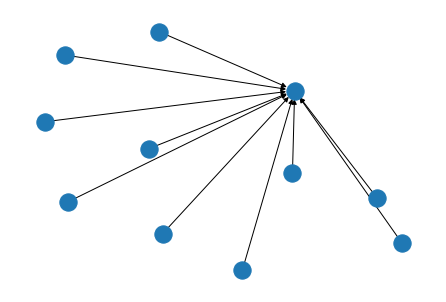

In [8]:
p1d1 = nx.draw(G1D1)
plt.draw()
plt.savefig('p1d1.pdf')

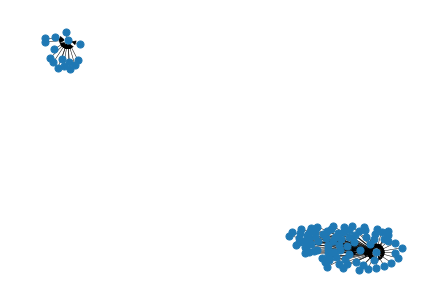

In [9]:
p1d2 = nx.draw(G1D2, width=0.5, node_size= 50)
plt.draw()
plt.savefig('p1d2.pdf')

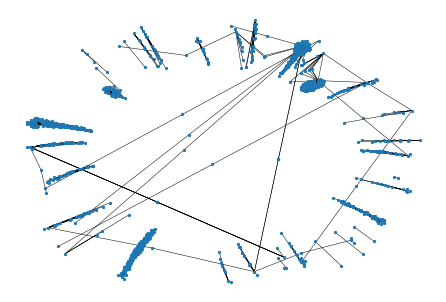

In [10]:
p1d3 = nx.draw_spring(G1D3, node_size = 10, arrows = False, width=0.5)
plt.draw()
plt.savefig('p1d3.pdf')

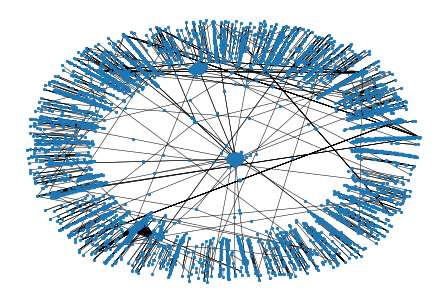

In [11]:
p1d4 = nx.draw_spring(G1D4, node_size = 5, arrows = False, width=0.5)
plt.draw()
plt.savefig('p1d4.pdf')

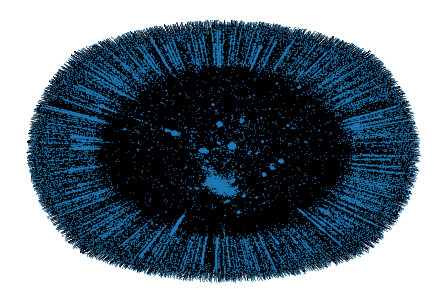

In [46]:
p1d5 = nx.draw_spring(G1D5, node_size = 0.1, arrows = False, width=0.5)
plt.draw()
plt.savefig('p1d5.pdf')

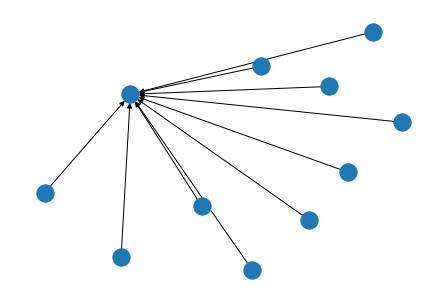

In [12]:
p2d1 = nx.draw(G2D1)
plt.draw()
plt.savefig('p2d1.pdf')

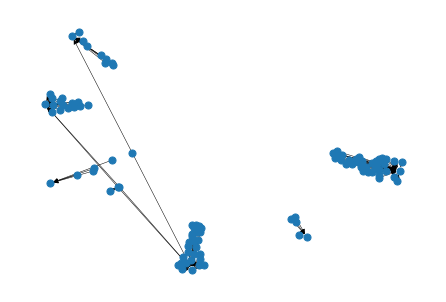

In [13]:
p2d2 = nx.draw(G2D2, width=0.5, node_size= 50)
plt.draw()
plt.savefig('p2d2.pdf')

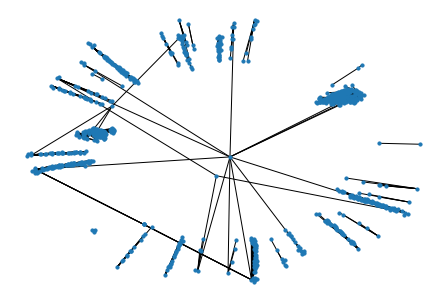

In [14]:
p2d3 = nx.draw_spring(G2D3, node_size = 10, arrows = False)
plt.draw()
plt.savefig('p2d3.pdf')

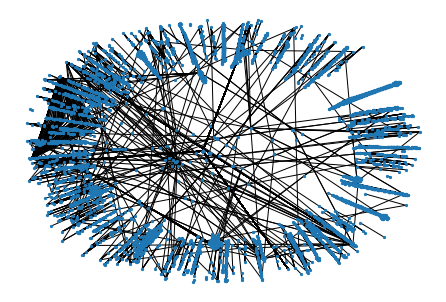

In [50]:
p2d4 = nx.draw_spring(G2D4, node_size = 5, arrows = False)
plt.draw()
plt.savefig('p2d4.pdf')

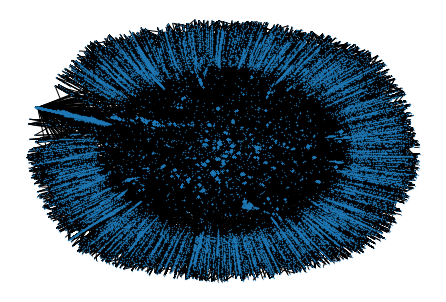

In [47]:
p2d5 = nx.draw_spring(G2D5, node_size = 0.1, arrows = False)
plt.draw()
plt.savefig('p2d5.pdf')

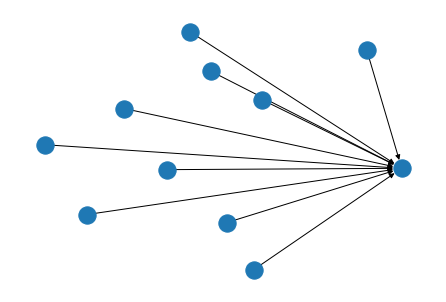

In [15]:
p3d1 = nx.draw(G3D1)
plt.draw()
plt.savefig('p3d1.pdf')

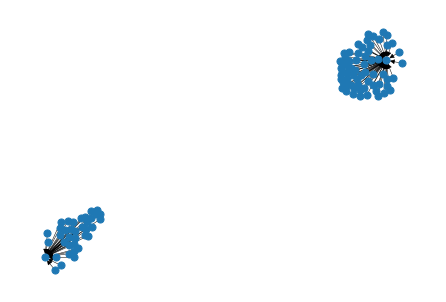

In [16]:
p3d2 = nx.draw(G3D2, width=0.5, node_size= 50)
plt.draw()
plt.savefig('p3d2.pdf')

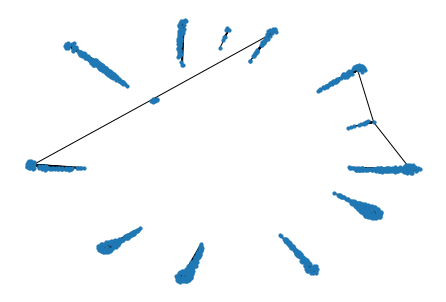

In [17]:
p3d3 = nx.draw_spring(G3D3, node_size = 10, arrows = False)
plt.draw()
plt.savefig('p3d3.pdf')

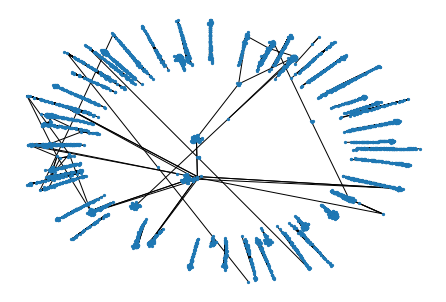

In [51]:
p3d4 = nx.draw_spring(G3D4, node_size = 5, arrows = False)
plt.draw()
plt.savefig('p3d4.pdf')

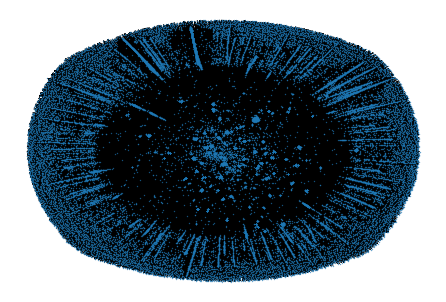

In [48]:
p3d5 = nx.draw_spring(G3D5, node_size = 0.1, arrows = False)
plt.draw()
plt.savefig('p3d5.pdf')

## (5) Basic Operations on the networks

### (5-1) The 100k Starting lines Network 

In [9]:
n1d1 = G1D1.number_of_nodes()
print("---> Number of Nodes = ",n1d1)
e1d1 = G1D1.number_of_edges()
print("---> Number of Edges =",e1d1)
Rho1d1 = nx.density(G1D1)
print("---> Density of the Network =",Rho1d1)
KM1d1 = 2.*e1d1/n1d1
print("---> Mean degree =",KM1d1)
print("------------------------------------")
n1d2 = G1D2.number_of_nodes()
print("---> Number of Nodes = ",n1d2)
e1d2 = G1D2.number_of_edges()
print("---> Number of Edges =",e1d2)
Rho1d2 = nx.density(G1D2)
print("---> Density of the Network =",Rho1d2)
KM1d2 = 2.*e1d2/n1d2
print("---> Mean degree =",KM1d2)
print("------------------------------------")
n1d3 = G1D3.number_of_nodes()
print("---> Number of Nodes = ",n1d3)
e1d3 = G1D3.number_of_edges()
print("---> Number of Edges =",e1d3)
Rho1d3 = nx.density(G1D3)
print("---> Density of the Network =",Rho1d3)
KM1d3 = 2.*e1d3/n1d3
print("---> Mean degree =",KM1d3)
print("------------------------------------")
n1d4 = G1D4.number_of_nodes()
print("---> Number of Nodes = ",n1d4)
e1d4 = G1D4.number_of_edges()
print("---> Number of Edges =",e1d4)
Rho1d4 = nx.density(G1D4)
print("---> Density of the Network =",Rho1d4)
KM1d4 = 2.*e1d4/n1d4
print("---> Mean degree =",KM1d4)
print("------------------------------------")
n1d5 = G1D5.number_of_nodes()
print("---> Number of Nodes = ",n1d5)
e1d5 = G1D5.number_of_edges()
print("---> Number of Edges =",e1d5)
Rho1d5 = nx.density(G1D5)
print("---> Density of the Network =",Rho1d5)
KM1d5 = 2.*e1d5/n1d5
print("---> Mean degree =",KM1d5)

---> Number of Nodes =  11
---> Number of Edges = 10
---> Density of the Network = 0.09090909090909091
---> Mean degree = 1.8181818181818181
------------------------------------
---> Number of Nodes =  102
---> Number of Edges = 100
---> Density of the Network = 0.009706853038245
---> Mean degree = 1.9607843137254901
------------------------------------
---> Number of Nodes =  1007
---> Number of Edges = 1000
---> Density of the Network = 0.0009871259039605465
---> Mean degree = 1.9860973187686197
------------------------------------
---> Number of Nodes =  8281
---> Number of Edges = 10000
---> Density of the Network = 0.00014584343299106796
---> Mean degree = 2.4151672503320856
------------------------------------
---> Number of Nodes =  48545
---> Number of Edges = 100000
---> Density of the Network = 4.243458267760587e-05
---> Mean degree = 4.119888763003399


### (5-2) The 100k Midling lines Network

In [10]:
n2d1 = G2D1.number_of_nodes()
print("---> Number of Nodes = ",n2d1)
e2d1 = G2D1.number_of_edges()
print("---> Number of Edges =",e2d1)
Rho2d1 = nx.density(G2D1)
print("---> Density of the Network =",Rho2d1)
KM2d1 = 2.*e2d1/n2d1
print("---> Mean degree =",KM2d1)
print("------------------------------------")
n2d2 = G2D2.number_of_nodes()
print("---> Number of Nodes = ",n2d2)
e2d2 = G2D2.number_of_edges()
print("---> Number of Edges =",e2d2)
Rho2d2 = nx.density(G2D2)
print("---> Density of the Network =",Rho2d2)
KM2d2 = 2.*e2d2/n2d2
print("---> Mean degree =",KM2d2)
print("------------------------------------")
n2d3 = G2D3.number_of_nodes()
print("---> Number of Nodes = ",n2d3)
e2d3 = G2D3.number_of_edges()
print("---> Number of Edges =",e2d3)
Rho2d3 = nx.density(G2D3)
print("---> Density of the Network =",Rho2d3)
KM2d3 = 2.*e2d3/n2d3
print("---> Mean degree =",KM1d3)
print("------------------------------------")
n2d4 = G2D4.number_of_nodes()
print("---> Number of Nodes = ",n2d4)
e2d4 = G2D4.number_of_edges()
print("---> Number of Edges =",e2d4)
Rho2d4 = nx.density(G2D4)
print("---> Density of the Network =",Rho1d4)
KM2d4 = 2.*e2d4/n2d4
print("---> Mean degree =",KM2d4)
print("------------------------------------")
n2d5 = G2D5.number_of_nodes()
print("---> Number of Nodes = ",n2d5)
e2d5 = G2D5.number_of_edges()
print("---> Number of Edges =",e2d5)
Rho2d5 = nx.density(G2D5)
print("---> Density of the Network =",Rho2d5)
KM2d5 = 2.*e2d5/n2d5
print("---> Mean degree =",KM2d5)

---> Number of Nodes =  11
---> Number of Edges = 10
---> Density of the Network = 0.09090909090909091
---> Mean degree = 1.8181818181818181
------------------------------------
---> Number of Nodes =  103
---> Number of Edges = 100
---> Density of the Network = 0.009518370454978107
---> Mean degree = 1.941747572815534
------------------------------------
---> Number of Nodes =  892
---> Number of Edges = 1000
---> Density of the Network = 0.001258222483932499
---> Mean degree = 1.9860973187686197
------------------------------------
---> Number of Nodes =  7384
---> Number of Edges = 10000
---> Density of the Network = 0.00014584343299106796
---> Mean degree = 2.7085590465872156
------------------------------------
---> Number of Nodes =  69585
---> Number of Edges = 100000
---> Density of the Network = 2.065261162269833e-05
---> Mean degree = 2.874182654307681


### (5-3) The 100k Last lines Network

In [11]:
n3d1 = G3D1.number_of_nodes()
print("---> Number of Nodes = ",n3d1)
e3d1 = G3D1.number_of_edges()
print("---> Number of Edges =",e3d1)
Rho3d1 = nx.density(G3D1)
print("---> Density of the Network =",Rho3d1)
KM3d1 = 2.*e3d1/n3d1
print("---> Mean degree =",KM3d1)
print("------------------------------------")
n3d2 = G3D2.number_of_nodes()
print("---> Number of Nodes = ",n3d2)
e3d2 = G3D2.number_of_edges()
print("---> Number of Edges =",e3d2)
Rho3d2 = nx.density(G3D2)
print("---> Density of the Network =",Rho3d2)
KM3d2 = 2.*e3d2/n3d2
print("---> Mean degree =",KM3d2)
print("------------------------------------")
n3d3 = G3D3.number_of_nodes()
print("---> Number of Nodes = ",n3d3)
e3d3 = G3D3.number_of_edges()
print("---> Number of Edges =",e3d3)
Rho3d3 = nx.density(G3D3)
print("---> Density of the Network =",Rho3d3)
KM3d3 = 2.*e3d3/n3d3
print("---> Mean degree =",KM3d3)
print("------------------------------------")
n3d4 = G3D4.number_of_nodes()
print("---> Number of Nodes = ",n3d4)
e3d4 = G3D4.number_of_edges()
print("---> Number of Edges =",e3d4)
Rho3d4 = nx.density(G3D4)
print("---> Density of the Network =",Rho3d4)
KM3d4 = 2.*e3d4/n3d4
print("---> Mean degree =",KM3d4)
print("------------------------------------")
n3d5 = G3D5.number_of_nodes()
print("---> Number of Nodes = ",n3d5)
e3d5 = G3D5.number_of_edges()
print("---> Number of Edges =",e3d5)
Rho3d5 = nx.density(G3D5)
print("---> Density of the Network =",Rho3d5)
KM3d5 = 2.*e3d5/n3d5
print("---> Mean degree =",KM3d5)

---> Number of Nodes =  11
---> Number of Edges = 10
---> Density of the Network = 0.09090909090909091
---> Mean degree = 1.8181818181818181
------------------------------------
---> Number of Nodes =  102
---> Number of Edges = 100
---> Density of the Network = 0.009706853038245
---> Mean degree = 1.9607843137254901
------------------------------------
---> Number of Nodes =  1009
---> Number of Edges = 1000
---> Density of the Network = 0.0009832145610143628
---> Mean degree = 1.9821605550049555
------------------------------------
---> Number of Nodes =  5215
---> Number of Edges = 10000
---> Density of the Network = 0.0003677686117580774
---> Mean degree = 3.8350910834132312
------------------------------------
---> Number of Nodes =  43186
---> Number of Edges = 100000
---> Density of the Network = 5.361966491773797e-05
---> Mean degree = 4.631130458945028


## (6) Analysing the directed Graph structure 

### (6-1) Degrees

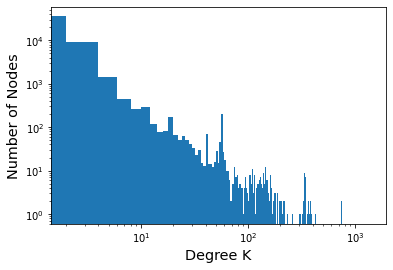

In [43]:
dK1 = G1D5.degree()
lK1 = list(dict(dK1).values())
h1 = plt.hist(lK1,bins=range(0,max(lK1)+2,2))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree K', fontsize='x-large')
plt.ylabel('Number of Nodes', fontsize='x-large')
plt.draw()
plt.savefig('H1.pdf')

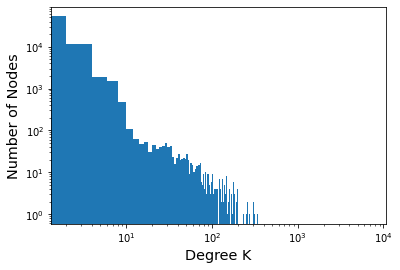

In [46]:
dK2 = G2D5.degree()
lK2 = list(dict(dK2).values())
h2 = plt.hist(lK2,bins=range(0,max(lK2)+2,2))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree K', fontsize='x-large')
plt.ylabel('Number of Nodes', fontsize='x-large')
plt.draw()
plt.savefig('H2.pdf')

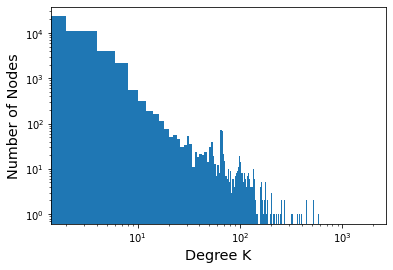

In [45]:
dK3 = G3D5.degree()
lK3 = list(dict(dK3).values())
h3 = plt.hist(lK3,bins=range(0,max(lK3)+2,2))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree K', fontsize='x-large')
plt.ylabel('Number of Nodes', fontsize='x-large')
plt.draw()
plt.savefig('H3.pdf')

### (6-2) Triangles-Clustering-Transitivity 

In [12]:
T1 = nx.transitivity(G1D5)
T2 = nx.transitivity(G2D5)
T3 = nx.transitivity(G3D5)
print("Transitivity:" ,"T1 = ", T1 ,"-----------T2 = ", T2, "-----------T3 = ", T3)

Transitivity: T1 =  0.36340151558191264 -----------T2 =  0.7511616594769652 -----------T3 =  0.01151495137050244


### (6-3) K-Cores 

-------->KCmax1 =  108
----->Number of nodes and links in the maximum k-core ( 55 , 2970 )


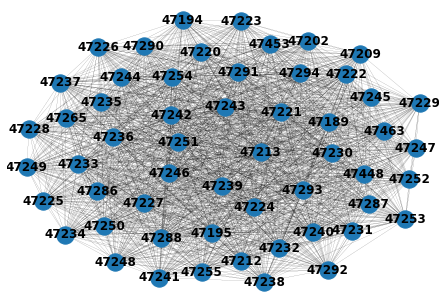

In [21]:
G1D5.remove_edges_from(nx.selfloop_edges(G1D5))
dCN1 = nx.core_number(G1D5)
kG1 = nx.k_core(G1D5)
KCmax1 = max(dCN1.values())
print("-------->KCmax1 = ", KCmax1)
PC1 = nx.draw_spring(kG1, with_labels=True, font_weight='bold', width = 0.05, arrows = False)
plt.draw()
plt.savefig('PCI1.pdf')
print("----->Number of nodes and links in the maximum k-core","(" ,kG1.number_of_nodes(),",",kG1.number_of_edges(),")")

-------->KCmax2 =  16
----->Number of nodes and links in the maximum k-core ( 9 , 72 )


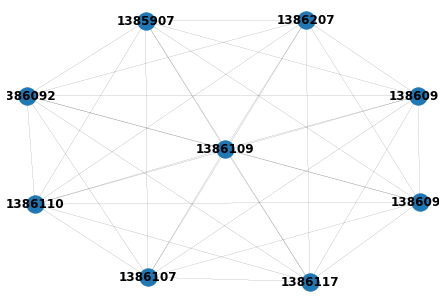

In [22]:
G2D5.remove_edges_from(nx.selfloop_edges(G2D5))
dCN2 = nx.core_number(G2D5)
kG2 = nx.k_core(G2D5)
KCmax2 = max(dCN2.values())
print("-------->KCmax2 = ", KCmax2)
PC2 = nx.draw_spring(kG2, with_labels=True, font_weight='bold', width = 0.05, arrows = False)
plt.draw()
plt.savefig('PCI2.pdf')
print("----->Number of nodes and links in the maximum k-core","(" ,kG2.number_of_nodes(),",",kG2.number_of_edges(),")")

-------->KCmax3 =  64
----->Number of nodes and links in the maximum k-core ( 130 , 4224 )


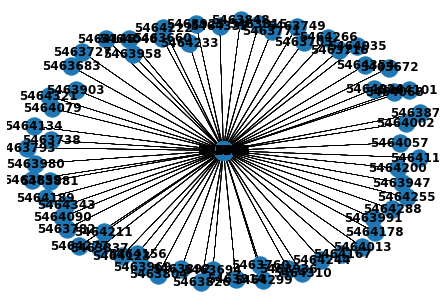

In [23]:
G3D5.remove_edges_from(nx.selfloop_edges(G3D5))
dCN3 = nx.core_number(G3D5)
kG3 = nx.k_core(G3D5)
KCmax3 = max(dCN3.values())
print("-------->KCmax3 = ", KCmax3)
PC3 = nx.draw_spring(kG3, with_labels=True, font_weight='bold', width = 0.05, arrows = False)
plt.draw()
plt.savefig('PCI3.pdf')
print("----->Number of nodes and links in the maximum k-core","(" ,kG3.number_of_nodes(),",",kG3.number_of_edges(),")")

## (7) Performing a random walk in Network

### (7-1) Probing Networks properties

In [204]:
SL1 = G1D5.remove_edges_from(nx.selfloop_edges(G1D5))
print(SL1.number_of_nodes()/G1D5.number_of_nodes())
SL2 = G2D5.remove_edges_from(nx.selfloop_edges(G2D5))
print(SL2.number_of_nodes()/G2D5.number_of_nodes())
SL3 = G3D5.remove_edges_from(nx.selfloop_edges(G3D5))
print(SL3.number_of_nodes()/G3D5.number_of_nodes())

AttributeError: 'NoneType' object has no attribute 'number_of_nodes'

#### Checking Directed Paths

In [205]:
SL1 = G1D5.selfloop()
print(SL1)

AttributeError: 'DiGraph' object has no attribute 'selfloop'

In [199]:
sol1 = G1D5.edges()
GRbo1 = nx.DiGraph()
b=0
bb=0
for b in sol1:
    for bb in sol1:
        if b < bb:
            ii = b[1]
            jj = bb[0]
            if (ii == jj):
                GRbo1.add_node(ii)
NNGR1 = GRbo1.number_of_nodes()
print("--->Number of Nodes in Maximum Path:", NNGR1)

--->Number of Nodes in Maximum Path: 1160


In [ ]:
GRbo1 = nx.DiGraph()

for edge1 in G1D5.edges():
    for edge2 in G1D5.edges():
        if edge1 != edge2:
            if edge1[1] != edge2[0]:
                GRbo1.add_node(edge1[0])
                
NNGR1 = GRbo1.number_of_nodes()
print("--->Number of Nodes in Maximum Path:", NNGR1)            

In [200]:
sol2 = G2D5.edges()
ssol2 = G2D5.edges()
GRbo2 = nx.DiGraph()
b=0
bb=0
for b in sol2:
    for bb in ssol2:
        if b != bb:
            ii = b[1]
            jj = bb[0]
            if (ii == jj):
                GRbo2.add_edge(ii, jj)
NNGR2 = GRbo2.number_of_nodes()
print("--->Number of Nodes in Maximum path:", NNGR2)

--->Number of Nodes in Maximum path: 1129


In [201]:
sol3 = G3D5.edges()
ssol3 = G3D5.edges()
GRbo3 = nx.Graph()
b=0
bb=0
for b in sol3:
    for bb in ssol3:
        if b < bb:
            ii = b[1]
            jj = bb[0]
            if (ii == jj):
                GRbo3.add_edge(ii, jj)
NNGR3 = GRbo3.number_of_nodes()
print("--->Number of Nodes in Maximum path:", NNGR3)
#PGRbo3 = nx.draw(GRbo3, with_labels=True, width = 1)
#plt.figure(figsize=[16,9])
#plt.draw()
#plt.savefig('PGRbo3.pdf')

--->Number of Nodes in Maximum path: 638


In [191]:
OUTDEGREE1 = G1D5.out_degree()
OUTDEGREE2 = G2D5.out_degree()
OUTDEGREE3 = G3D5.out_degree()
INDEGREE1 = G1D5.in_degree()
INDEGREE2 = G2D5.in_degree()
INDEGREE3 = G3D5.in_degree()

In [192]:
OUTDEGF1 = nx.DiGraph()
INDEGF1 = nx.DiGraph()
for outf in OUTDEGREE1:
    if outf[1] != 0:
        OUTDEGF1.add_node(outf[0])
for inf in INDEGREE1:
    if inf[1] != 0:
        INDEGF1.add_node(inf[0])
print("----->Ratio for nodes that have out-degree:", (OUTDEGF1.number_of_nodes()/G1D5.number_of_nodes()))
print("----->Ratio for nodes that have in-degree:", (INDEGF1.number_of_nodes()/G1D5.number_of_nodes()))
OUTDEGF2 = nx.DiGraph()
INDEGF2 = nx.DiGraph()
for outf in OUTDEGREE2:
    if outf[1] != 0:
        OUTDEGF2.add_node(outf[0])
for inf in INDEGREE2:
    if inf[1] != 0:
        INDEGF2.add_node(inf[0])
print("----->Ratio for nodes that have out-degree:", (OUTDEGF2.number_of_nodes()/G2D5.number_of_nodes()))
print("----->Ratio for nodes that have in-degree:", (INDEGF2.number_of_nodes()/G2D5.number_of_nodes()))
OUTDEGF3 = nx.DiGraph()
INDEGF3 = nx.DiGraph()
for outf in OUTDEGREE3:
    if outf[1] != 0:
        OUTDEGF3.add_node(outf[0])
for inf in INDEGREE3:
    if inf[1] != 0:
        INDEGF3.add_node(inf[0])
print("----->Ratio for nodes that have out-degree:", (OUTDEGF3.number_of_nodes()/G3D5.number_of_nodes()))
print("----->Ratio for nodes that have in-degree:", (INDEGF3.number_of_nodes()/G3D5.number_of_nodes()))

----->Ratio for nodes that have out-degree: 0.8894015861571738
----->Ratio for nodes that have in-degree: 0.13669790915645277
----->Ratio for nodes that have out-degree: 0.9792196594093555
----->Ratio for nodes that have in-degree: 0.037005101674211394
----->Ratio for nodes that have out-degree: 0.7881952484601491
----->Ratio for nodes that have in-degree: 0.22801370814615848


In [170]:
DEGF1 = nx.DiGraph()
DEGF2 = nx.DiGraph()
DEGF3 = nx.DiGraph()

for FO1 in G1D5.out_degree():
    for FI1 in G1D5.in_degree():
        if (FO1[0] == FI1[0]):
            if (FO1[1] != 0) & (FI1[1] != 0):
                    DEGF1.add_node(FO1[0])

for FO2 in G2D5.out_degree():
    for FI2 in G2D5.in_degree():
        if (FO2[0] == FI2[0]):
            if (FO2[1] != 0) & (FI2[1] != 0):
                    DEGF2.add_node(FO2[0])

for FO3 in G3D5.out_degree():
    for FI3 in G3D5.in_degree():
        if (FO3[0] == FI3[0]):
            if (FO3[1] != 0) & (FI3[1] != 0):
                    DEGF3.add_node(FO3[0])

In [197]:
DEGF1 = nx.DiGraph()
for FO1 in G1D5.out_degree():
    for FI1 in G1D5.in_degree():
        if (FO1[0] == FI1[0]):
            if (FO1[1] != 0) & (FI1[1] != 0):
                    DEGF1.add_node(FO1[0])

In [198]:
print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / All nodes", (DEGF1.number_of_nodes()/G1D5.number_of_nodes()))
print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-out nodes", (DEGF1.number_of_nodes()/OUTDEGF1.number_of_nodes()))
print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-in nodes", (DEGF1.number_of_nodes()/INDEGF1.number_of_nodes()))

print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / All nodes", (DEGF2.number_of_nodes()/G2D5.number_of_nodes()))
print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-out nodes", (DEGF2.number_of_nodes()/OUTDEGF2.number_of_nodes()))
print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-in nodes", (DEGF2.number_of_nodes()/INDEGF2.number_of_nodes()))

print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / All nodes", (DEGF3.number_of_nodes()/G3D5.number_of_nodes()))
print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-out nodes", (DEGF3.number_of_nodes()/OUTDEGF3.number_of_nodes()))
print("----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-in nodes", (DEGF3.number_of_nodes()/INDEGF3.number_of_nodes()))

----->Ratio of Nodes that have a non null (K-in,K-out) nodes / All nodes 0.02609949531362653
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-out nodes 0.029345006485084306
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-in nodes 0.1909282700421941
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / All nodes 0.01622476108356686
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-out nodes 0.01656907204391024
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-in nodes 0.43844660194174756
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / All nodes 0.0162089566063076
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-out nodes 0.02056464643497165
----->Ratio of Nodes that have a non null (K-in,K-out) nodes / k-in nodes 0.07108764090585966


### (7-2) Extraction of Random walk properties

### (7-3) Alternative way to measure reachability

#### Detecting All Possible paths

### (7-4) Estimating the reachability for each node

####  (7-4-1) Mean reachability

#### (7-4-2) Most Reachable Node

In [178]:
# Probability to move ahead or below
## Just a random surfing
prob1 = [0.5, 0.5]
## Reading articles
prob2 = [0.2, 0.8]
  
# Defining the starting position
start = sob[0]
# Initialize Positions with the starting position
positions = [start]
  
# creating the random points
sob = G1D3.nodes()
ssob = G1D3.nodes()
for v in sob:
    for vv in ssob:
        SG1 = nx.add_edge(v,vv)

  
#plotting down the graph of the random walk in 1D 
fig, ax = plt.subplots(1, 1, figsize=(16,9))
plt.plot(positions,label=r'$\beta$')
plt.xlabel(r'$\mathbf{\alpha}$', fontsize='xx-large')
plt.legend(fontsize='x-large', loc='upper left')
plt.savefig('image.pdf')
plt.xlim(-10,110)
plt.show() 


KeyError: 0

In [2]:
s = [1, 2, 3]
for i in s:
    for j in s:
        print(i,j)

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
